In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

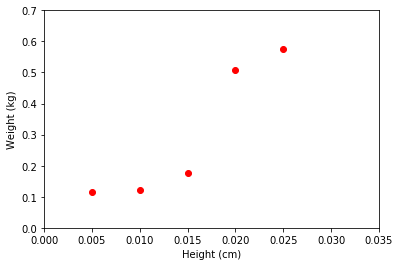

In [5]:
# height (cm)
X = np.array([[0.025, 0.02, 0.015, 0.010, 0.005]]).T
# weight (kg)
y = np.array([[ 0.574 ,
0.5093 ,
0.17712 ,
0.12264,
0.11508 ,]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([0, 0.035, 0, 0.7])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-0.091722]
 [26.09    ]]
[0.05       0.07777778 0.10555556 0.13333333 0.16111111 0.18888889
 0.21666667 0.24444444 0.27222222 0.3       ]


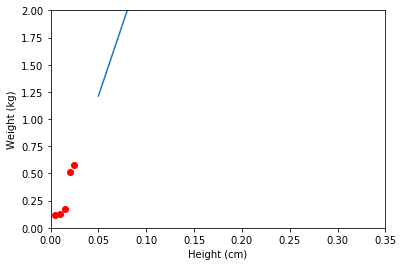

In [12]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(5, 30, 10)
x0 = np.true_divide(x0, 100)
y0 = w_0 + w_1*x0
print(x0)
# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([0, 0.35, 0, 2])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [13]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 4043.86 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 4174.31 (kg), real number: 56 (kg)


In [14]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-0.091722 26.09    ]]
Solution found by (5):  [[-0.091722 26.09    ]]


In [7]:
print(regr.coef_[0][1])

6.396756756756758


In [17]:
from sklearn.metrics import r2_score
y_pred = w_0 + w_1*X
print(y_pred)
print(y)
r2_score(y, y_pred)

[[0.560528]
 [0.430078]
 [0.299628]
 [0.169178]
 [0.038728]]
[[0.574  ]
 [0.5093 ]
 [0.17712]
 [0.12264]
 [0.11508]]


0.8524231772373574

Solution found by scikit-learn  :  [[4.100e-03 2.682e+01]]


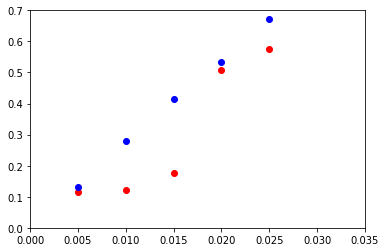

R2:  0.9986167043912277
Solution found by UV-VIS:  26.820000000000004
R2:  0.8524231772373574
Solution found by Avantes:  [26.09]


In [21]:
ynew = np.array([[
0.673,
0.534,
0.416,
0.279,
0.13]]).T
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, ynew)
print( 'Solution found by scikit-learn  : ', regr.coef_ )
ynew_pred = regr.coef_[0][0] + regr.coef_[0][1]*X
yn = regr.coef_[0][0] + regr.coef_[0][1]*x0

plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0, 'm')               # the fitting line
plt.plot(X.T, ynew.T, 'bo')
plt.plot(x0, yn, 'g')   
plt.axis([0, 0.035, 0, 0.7])
plt.show()
print('R2: ',r2_score(ynew, ynew_pred))
print( 'Solution found by UV-VIS: ', regr.coef_[0][1])
print('R2: ',r2_score(y, y_pred))
print( 'Solution found by Avantes: ', w[1].T)